In [1]:
import numpy as np
import matplotlib.pyplot as plt
from begepro.rw import CAENhandler
from begepro.dspro import filters as flt

In [2]:
filename = '../../data/Fondo_22-07-2021_1/FILTERED/DataF_CH1@DT5725SB_10806_Fondo_22-07-2021_1.bin'
rd = CAENhandler.compassReader(filename, calibrated=True)

In [3]:
data = rd.get()

In [4]:
raw_wf = np.array(data['trace'])

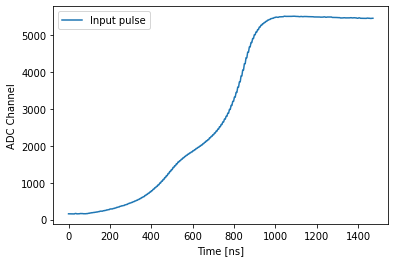

In [5]:
#%matplotlib widget
plt.plot(4*np.linspace(0,len(data['trace']),num=len(data['trace'])), raw_wf, label='Input pulse')
plt.xlabel(r'Time [ns]')
plt.ylabel(r'ADC Channel')
plt.legend()

In [6]:
curr = flt.curr_filter(raw_wf)

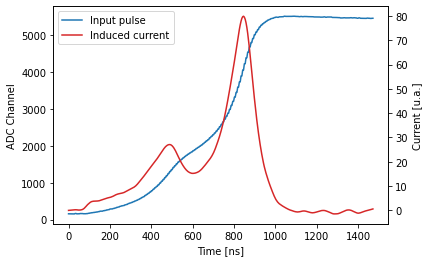

In [7]:
#%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111)

carica = ax.plot(4*np.linspace(0,len(data['trace']),num=len(data['trace'])), raw_wf, 
                 label='Input pulse')
ax.set_ylabel(r'ADC Channel')
ax.set_xlabel(r'Time [ns]')

ax2 = ax.twinx()
corrente = ax2.plot(4*np.linspace(0,len(data['trace']),num=len(data['trace'])), curr, 
                    color='tab:red', label='Induced current')
ax2.set_ylabel(r'Current [u.a.]')
#plt.locator_params(axis='y', nbins=4)
#plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

gr = carica + corrente 
labels = [l.get_label() for l in gr]
ax.legend(gr, labels, loc=0)